In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('prices.csv',index_col='Date',parse_dates=True)


In [101]:
df.head()

,Price
Date,
2017-02-21,55.478001
2017-02-22,54.702000
2017-02-23,51.198002
2017-02-24,51.400002
2017-02-27,49.245998


<AxesSubplot: xlabel='Date'>

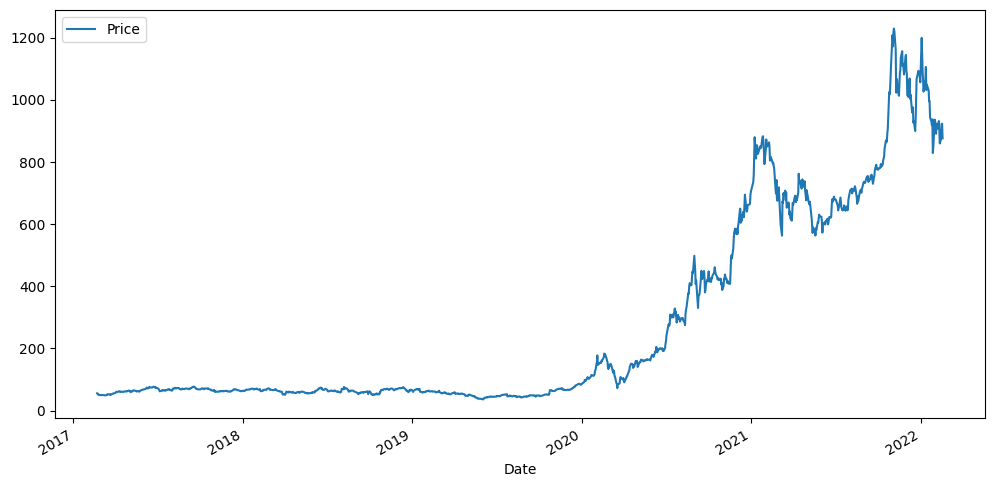

In [102]:
df.plot(figsize=(12,6))


In [103]:
len(df)

1259

In [104]:
train = df.iloc[:830]
test = df.iloc[830:]

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
df.head(),df.tail()

(                Price
 Date                 
 2017-02-21  55.478001
 2017-02-22  54.702000
 2017-02-23  51.198002
 2017-02-24  51.400002
 2017-02-27  49.245998,
                  Price
 Date                  
 2022-02-11  860.000000
 2022-02-14  875.760010
 2022-02-15  922.429993
 2022-02-16  923.390015
 2022-02-17  876.349976)

In [107]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [108]:
scaled_train[:10]

array([[0.1276607 ],
       [0.12262794],
       [0.09990274],
       [0.10121281],
       [0.08724301],
       [0.09212013],
       [0.09215905],
       [0.09275571],
       [0.09416953],
       [0.09370259]])

In [109]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [110]:
# define generator
time_steps = 3
features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=time_steps, batch_size=1)

In [111]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1276607  0.12262794 0.09990274 0.10121281 0.08724301 0.09212013
 0.09215905 0.09275571 0.09416953 0.09370259 0.09030417 0.08807317]
Predict this y: 
 [[0.08551788]]


In [112]:
X.shape

(1, 12, 1)

In [113]:
# We do the same thing, but now instead for 12 months
time_steps = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=time_steps, batch_size=1)

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [115]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [117]:
# fit model
model.fit(generator,epochs=35)

Epoch 1/20
818/818 [==============================] - 9s 9ms/step - loss: 0.0034
Epoch 2/20
818/818 [==============================] - 6s 7ms/step - loss: 0.0021
Epoch 3/20
818/818 [==============================] - 6s 7ms/step - loss: 0.0017
Epoch 4/20
818/818 [==============================] - 6s 7ms/step - loss: 0.0012
Epoch 5/20
818/818 [==============================] - 7s 8ms/step - loss: 0.0011
Epoch 6/20
818/818 [==============================] - 8s 10ms/step - loss: 0.0010
Epoch 7/20
818/818 [==============================] - 7s 9ms/step - loss: 9.1122e-04
Epoch 8/20
818/818 [==============================] - 6s 7ms/step - loss: 9.1201e-04
Epoch 9/20
818/818 [==============================] - 5s 7ms/step - loss: 8.7837e-04
Epoch 10/20
818/818 [==============================] - 6s 7ms/step - loss: 7.6283e-04
Epoch 11/20
818/818 [==============================] - 6s 7ms/step - loss: 8.6241e-04
Epoch 12/20
818/818 [==============================] - 6s 7ms/step - loss: 7.9889e-04


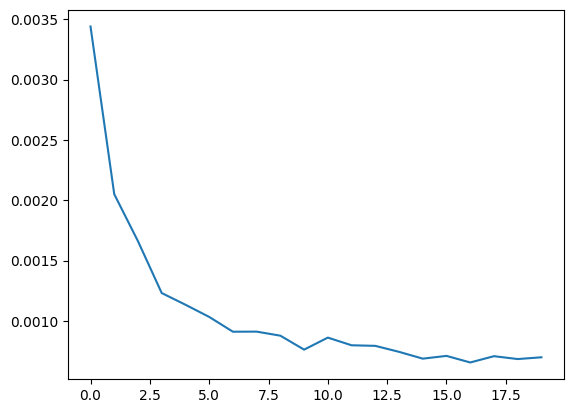

In [118]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [119]:
last_train_batch = scaled_train[-12:]

In [120]:
last_train_batch = last_train_batch.reshape((1, time_steps, features))

In [121]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 211ms/step


array([[1.0713958]], dtype=float32)

In [122]:
scaled_test[0]

array([0.98800187])

In [125]:
test.head()

,Price
Date,
2020-06-09,188.134003
2020-06-10,205.009995
2020-06-11,194.567993
2020-06-12,187.056000
2020-06-15,198.179993
